# INTERRUPTED TIME SERIES ANALYSIS

Ref. https://www.xboard.dev/posts/2020_01_01_interrupted-time-series-python-part-I/index.html
<br/>Author: Flavio Regis de Arruda
<br/>This Document Created by: Hernan Chavez

## WHEN A/B TEST IS NOT AN OPTION

What is A/B/ test?
* There are two almost identical versions of a product, simulatenaously running, that only differ by the hypothesis you want to test.
* Users are randomly chosen to experience one (an only one) of the two versions while the experiment is active.
* Easy to understand, easy to setup.
* They rule out covariate difference between the groups.


## WHEN A/B TEST IS NOT POSSIBLE?

* Change is too spread and complex that it would be technically impossible to keep two different versions running simulatenously.
* A new feature roullout will be available to some customers and later for others.
* Having a subset of customers with acess to a feature or bug fix that gives them a competitive advantage over others that don't have access.
* A change becomes legally mandatory and should be applied to all customers at the same time.
* YOU WANT TO ANALYZE AN EVENT THAT HAS ALREADY HAPPENED.

## QUASI EXPERIMENTS...THE SECOND BEST ALTERNATIVE?

What is a quasi experiment?

In a quasi experiment, a treatment and a control group are not dividied by a completely random process but by a natural process (i.e. time, location, etc.) therefore there is a much larger chance for imbalance due to skewness and heterogeneous differences.

## WHEN ARE QUASI EXPERIMENTS NOT POSSIBLE?

In scenarios where having a control group in parallel to a test group is just not possible.

## INTERRUPTED TIME SERIES (ITS)

Interrupted time series (ITS) is a method of statistical analysis involving tracking a period before and after an intervention at a known point in time to assess the intervention's effecs with a ***single group/population***.

Effects on the intervention are evaluated by changes in the level and slope of the time series and statistical significance of the intervention parameters. The more observations you have before and after the intervention, the more robust the model will be.

Because the evaluation is based on observing a single population over time, the ITS design is free from problems due to between-group difference but are suceptible to ***TIME-VARYING COFOUNDERS*** like other interventions ocurring around the time of the intervention that may also affect the outcome.

<img src="IMAGES/FIG_1.png" alt="INTERRUPTED TIME SERIES" width="700" height="500" >

Strenghts of ITS:
* Ability to constrol for a ***SECULAR TREND*** in data (unlike a 2-period before-and-after t-test) (Note: **SECULAR TREND: The secular variation of a time series is its long-term, non-periodic variation. Whether a variation is perceived as secular or not depends on the available timescale)**.
* Ability to evaluate outcomes using population-level data.
* Clear graphical presentation of results.
* Ease of conducting stratified analyses, and...
* Ability to evaluate both intended and unintended consequences of interventions.

Limitations to ITS:
* Need for a minimum of 8 periods before and 8 periods after an intervention to evaluate changes statistically (***why 8?***)
* Difficulty in analyzing the independent impact of separate components of a program that are implemented close together in time.
* Existance of a suitable control population.

In mathematical terms, it means that the time seies equation includes four key components:

Equation (1):     *Y=b<sub>0</sub> + b<sub>1</sub>T + b<sub>2</sub>D + b<sub>3</sub>P + $\epsilon$*

where 

*Y* is the outcome variable;

*T* is a continous variable which indicates the time passes from start of the observational period;

*D* is dummy variable indicating observation collected before (D=0) or after (D=1) the intervention;

*P* is a continuous variable indicating time passed since the intervention has (before intervention has ocurred *P* is equal to 0);

With $\epsilon$ representing a zero centered gaussian random error.

# COUNTERFACTUAL: WHAT WOULD HAVE HAPPENED HAD THE POLICY INTERVENTION NOT HAPPENED?

***Counterfactuals*** are simply ways of comparing what happens given a change, versus what should should have happened had some change not occurred in the first place.

In a randomized trial or A/B tst we know that counterfactual average outcome because the experiment witheld the intervention from the control group (which by randomization is somewhat the same as the intervention group). A critical assumption in ITS is that the outcome of interest trend would remain unchanged in the absence of intervention.

# A PRACTICAL EXAMPLE

Bob runs a large ans succesful blog on personal finance. During a webinar he learns that making a web content load facter could reduce its bounce rate (Note: bounce rate represents the percentage of visitors who enter the site and then leave ("bounce") rather than continuing to view other pages within the same site) and therefore decides to sign up to a CDN service. It's been 6 months since he added a CDN to his blog and he wants to know if the investment he did reduced the bounce rate.

# DATA 

Bob provides us with 24 weekes of data before adding the CDN and 24 weeks after the "intervention". Therefore, weeks 1 to 24 have a bouncing rate before intervention and weeks 25 to 48 after it. 

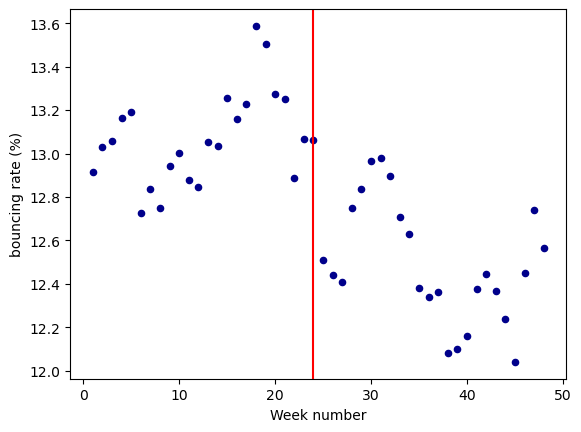

In [1]:
import pandas as pd

df = pd.read_csv("raw_data.csv")
ax1 = df.plot.scatter(x='Week number', y='bouncing rate (%)', c='DarkBlue')
ax1.axvline(24, color ='red')

Visually, it looks like after enabling the CDN the bounce rate decreased, but by how much, and does it have statistical significance? To answer this question using interrupted time series analysis, we first need to preaprate our data.

## DATASET PREPARATION

Using equation (1) notation with values for column D (0 = before intervention, 1 = after intervention) and P (number of weeks since intervention started):  

In [2]:
mask1 = ((df['Week number'] <= 24))
df.loc[mask1, 'D'] = 0
df.loc[~mask1, 'D'] = 1

mask2 = ((df['Week number'] <= 24))
df.loc[mask2, 'P'] = 0
df.loc[~mask2, 'P'] = df.loc[~mask1,'Week number'] - 24

df.rename(columns={"bouncing rate (%)": "Y", "Week number": "T"}, inplace = True)
print(df)

           Y   T    D     P
0   12.91645   1  0.0   0.0
1   13.03090   2  0.0   0.0
2   13.05717   3  0.0   0.0
3   13.16564   4  0.0   0.0
4   13.19299   5  0.0   0.0
5   12.72709   6  0.0   0.0
6   12.83613   7  0.0   0.0
7   12.75080   8  0.0   0.0
8   12.94173   9  0.0   0.0
9   13.00086  10  0.0   0.0
10  12.87995  11  0.0   0.0
11  12.84633  12  0.0   0.0
12  13.05431  13  0.0   0.0
13  13.03660  14  0.0   0.0
14  13.25775  15  0.0   0.0
15  13.16052  16  0.0   0.0
16  13.22842  17  0.0   0.0
17  13.58732  18  0.0   0.0
18  13.50605  19  0.0   0.0
19  13.27372  20  0.0   0.0
20  13.24912  21  0.0   0.0
21  12.88532  22  0.0   0.0
22  13.06842  23  0.0   0.0
23  13.06377  24  0.0   0.0
24  12.51035  25  1.0   1.0
25  12.44297  26  1.0   2.0
26  12.40760  27  1.0   3.0
27  12.74984  28  1.0   4.0
28  12.83827  29  1.0   5.0
29  12.96573  30  1.0   6.0
30  12.98010  31  1.0   7.0
31  12.89759  32  1.0   8.0
32  12.70836  33  1.0   9.0
33  12.62780  34  1.0  10.0
34  12.38300  35  1.

# NAIVE SOLUTION

Let's implement an Ordinary Least Squares (OLS) regression using ***statsmodels*** to measure the impact of our intervention.

In [3]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols(formula='Y ~ T + D + P', data=df)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     29.18
Date:                Sun, 18 Feb 2024   Prob (F-statistic):           1.52e-10
Time:                        16:46:40   Log-Likelihood:                 4.8860
No. Observations:                  48   AIC:                            -1.772
Df Residuals:                      44   BIC:                             5.713
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.9100      0.096    134.225      0.0

The model estimates that the bounce rate decreased by ***0.52 (see "coef" for "D")*** and this effect is statistically significant (***P > |t| is virtually zero***).

it is also noteworth that the model estimates a small (on average ***0.0297 (see "coef" for "P")***) but with statistical significance trend of a decrease in bounce rate each year after intervention, which is unexpected since the CDN serves the whole website just a few hours after activation.

The figure below depicts how the model fits before and after intervention and how a counterfactual would be:

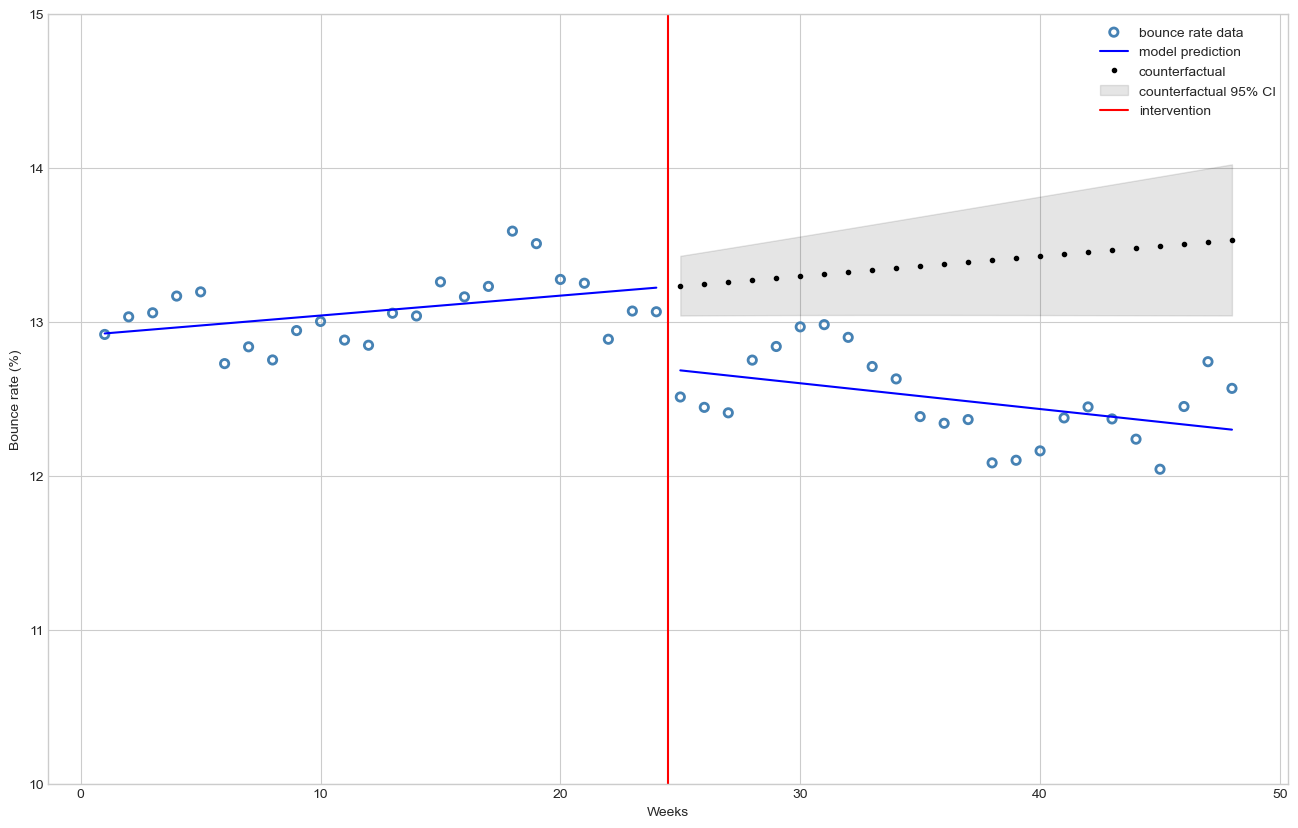

In [4]:
from matplotlib import pyplot as plt

start = 24
end = 48
beta = res.params

# Get model predictions and 95% confidence interval
predictions = res.get_prediction(df)
summary = predictions.summary_frame(alpha=0.05)

# mean predictions
y_pred = predictions.predicted_mean

# countefactual assumes no interventions
cf_df = df.copy()
cf_df["D"] = 0.0
cf_df["P"] = 0.0

# counter-factual predictions
cf = res.get_prediction(cf_df).summary_frame(alpha=0.05)

# Plotting
#plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')

fig, ax = plt.subplots(figsize=(16,10))

# Plot bounce rate data
ax.scatter(df["T"], df["Y"], facecolors='none', edgecolors='steelblue', label="bounce rate data", linewidths=2)

# Plot model mean bounce rate prediction
ax.plot(df["T"][:start], y_pred[:start], 'b-', label="model prediction")
ax.plot(df["T"][start:], y_pred[start:], 'b-')

# Plot counterfactual mean bounce rate with 95% confidence interval
ax.plot(df["T"][start:], cf['mean'][start:], 'k.', label="counterfactual")
ax.fill_between(df["T"][start:], cf['mean_ci_lower'][start:], cf['mean_ci_upper'][start:], color='k', alpha=0.1, label="counterfactual 95% CI");

# Plot line marking intervention moment
ax.axvline(x = 24.5, color = 'r', label = 'intervention')

ax.legend(loc='best')
plt.ylim([10, 15])
plt.xlabel("Weeks")
plt.ylabel("Bounce rate (%)");

# PROBLEMS WITH THE NAIVE APPROACH

OLS (Ordinary Least Squares) regression has **SEVEN MAIN ASSUMPTIONS** but in this case we will focus on two:

* Indvidual ***observations are independent***.
* ***Residuals follow a normal distribution***.

## LET'S FIRST CHECK FOR THE NORMALITY OF RESIDUALS:

We can appy the ***Jarque-Bera Test*** on residuals to check whether their skewness and kurtosis match a normal distribution (*H<sub>0</sub>*: residuals distribution follows a normal distribution). Our ***statsmodels OLS*** summary output shows a ***Prob(JB): 0.369*** which for a standard $\alpha$ level of 0.05, doesn't allow us to discard the null hypothesis (***H<sub>0</sub>***).

Let's plot the distribution of residuals.

<Axes: ylabel='Density'>

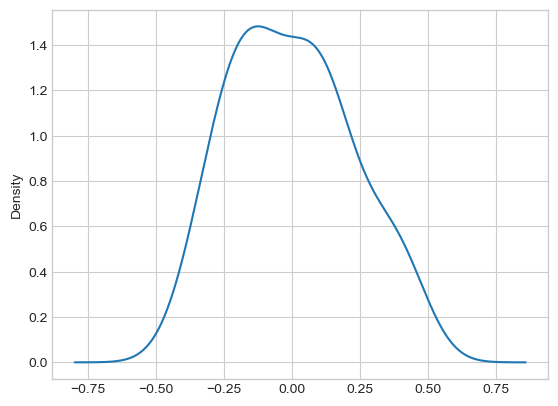

In [5]:
res.resid.plot(kind="kde")

Which for a small dataset (less than 50 points) looks sufficiently gaussian.

Overall, the assumption of normality of residuals can't be convincingly refuted.

## CHECKING INDEPENDENCE OF OBSERVATIONS

The ***Durbin-Watson statistic*** test if the residuals are correlated with its immediate predecessor, that is, if they have autocorrelation lag 1 or ***AR(1)***. Its value ranges from 0 to 4 and smaller than 1.5 indicate a positive autocorrelation, while values greater than 2.5 signal a negative autocorrelation.

If we take a look again at our OLS summary output we will observe that de ***Durbin-Watson statistic*** has a value of 0.665 which signals a strong positive ***AR(1)***.

Let's plot the residuals to see if we can observe this autocorrelation:

In [6]:
#pip install altair

In [7]:
df["residuals"] = res.resid
res_df = df[["T", "residuals"]]

In [8]:
import altair as alt

rules = alt.Chart(pd.DataFrame({
  'residuals': [0.0],
  'color': ['black']
})).mark_rule().encode(
  y='residuals',
  color=alt.Color('color:N', scale=None)
)

residual_plot = alt.Chart(res_df).mark_point().encode(
    x=alt.X('T', title="Weeks"),
    y=alt.Y('residuals', title="residuals")
).properties(
    width=800,
    height=300
)

rules + residual_plot 

alt.LayerChart(...)

Notice how residuals above/below zero have most points temporary close to it also above/below zero as well, which goes against the independence of observations assumption for OLS.

**IMPORTANT NOTE:** In practice when analyzing time series data the presence of autocorrelation is the rule instread of the exception since in general the factors that contributed to a given observatiom tend to persist for a while.

# AUTOREGRESSIVE MODEL SOLUTION

The autoregressive model specifies that each observation depends linearly on previous observations.

Thus, an autoregressive of order ***p (AR(p))*** can be writen as:

Equation (2):     *y<sub>t</sub> = c + $\phi$<sub>1</sub>y<sub>t-1</sub> + ... + $\phi$<sub>p</sub>y<sub>t-p</sub> + $\epsilon$<sub>t</sub>*

Where

*y<sub>t</sub>*: observation at time *t*,

*y<sub>t-i</sub>*: observation at time *t - i*,

*$\phi$<sub>i</sub>*: observation of how much observation *y<sub>t-i</sub>* correlates to *y<sub>t</sub>*,

*$\epsilon$<sub>t</sub>*: white noise ***(N(0,$\sigma$<sup>2</sup>))*** at time *t*.

## AUTOCORRELATION

To assess how much an observation correlated with past observations it is useful to do an autocorrelation plot as hsown below:

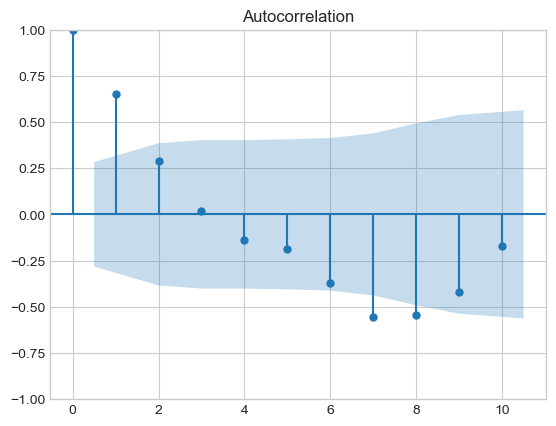

In [9]:
sm.graphics.tsa.plot_acf(res.resid, lags=10)
plt.show()

## PARTIAL AUTOCORRELATION

The partial autocorrelation at lag *p* is the correlation that results after removing the effect of any correlation due to the terms at shorter lags.

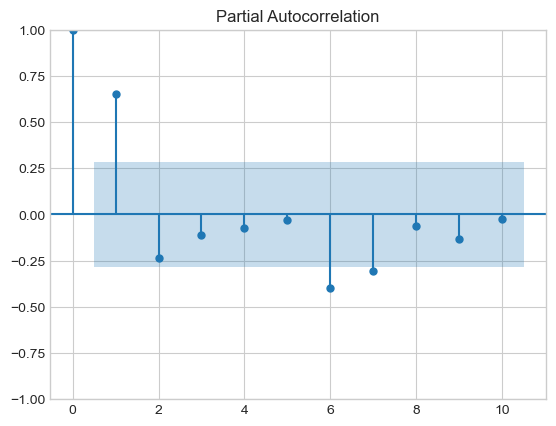

In [10]:
sm.graphics.tsa.plot_pacf(res.resid, lags=10)
plt.show()   

# MODEL SELECTION

The theory states that in an autoregressive model its autocorrelation plot should depict an exponential decay and the number of lags *p* should be taken from the partial autocorrelation chart using its *p* most relevant lags. Applying the theory to our plots above, we conclude that our model is autoregressive of model lag 1 also known as ***AR(1)**.

# ARIMA

In statistics ARIMA stands for ***autoregressive integrted moving average*** model and as can be inferred by the name AR models are a especial case of ARIMA, therefore ***AR(1)*** is equivalente to ***ARIMA(1,0,0)***.

We can model an ***AR(1)*** process to our dataset using ***statsmodels*** ARIMA as below:

In [11]:
from statsmodels.tsa.arima.model import ARIMA

arima_results = ARIMA(df["Y"], df[["T","D","P"]], order=(1,0,0)).fit()
print(arima_results.summary())

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                   48
Model:                 ARIMA(1, 0, 0)   Log Likelihood                  18.574
Date:                Sun, 18 Feb 2024   AIC                            -25.148
Time:                        16:46:42   BIC                            -13.921
Sample:                             0   HQIC                           -20.905
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.9172      0.279     46.245      0.000      12.370      13.465
T              0.0121      0.016      0.767      0.443      -0.019       0.043
D             -0.5510      0.273     -2.018      0.0

The autoregressive model estimates that the bounce rate decreased by ***0.55 (see "coef" of "D")*** on average and this effect is statistically significant ***P>|t| = 4.4%, less than our $\alpha$=5%***.

However, unlike the previous OLS model, the autoregressive model does not estimate a statistical significance trend of a decrease in bounce rate each week after intervention, which is in the line with our expectations.

The model estimates (with counterfactual projections) can be seen in the chart below:

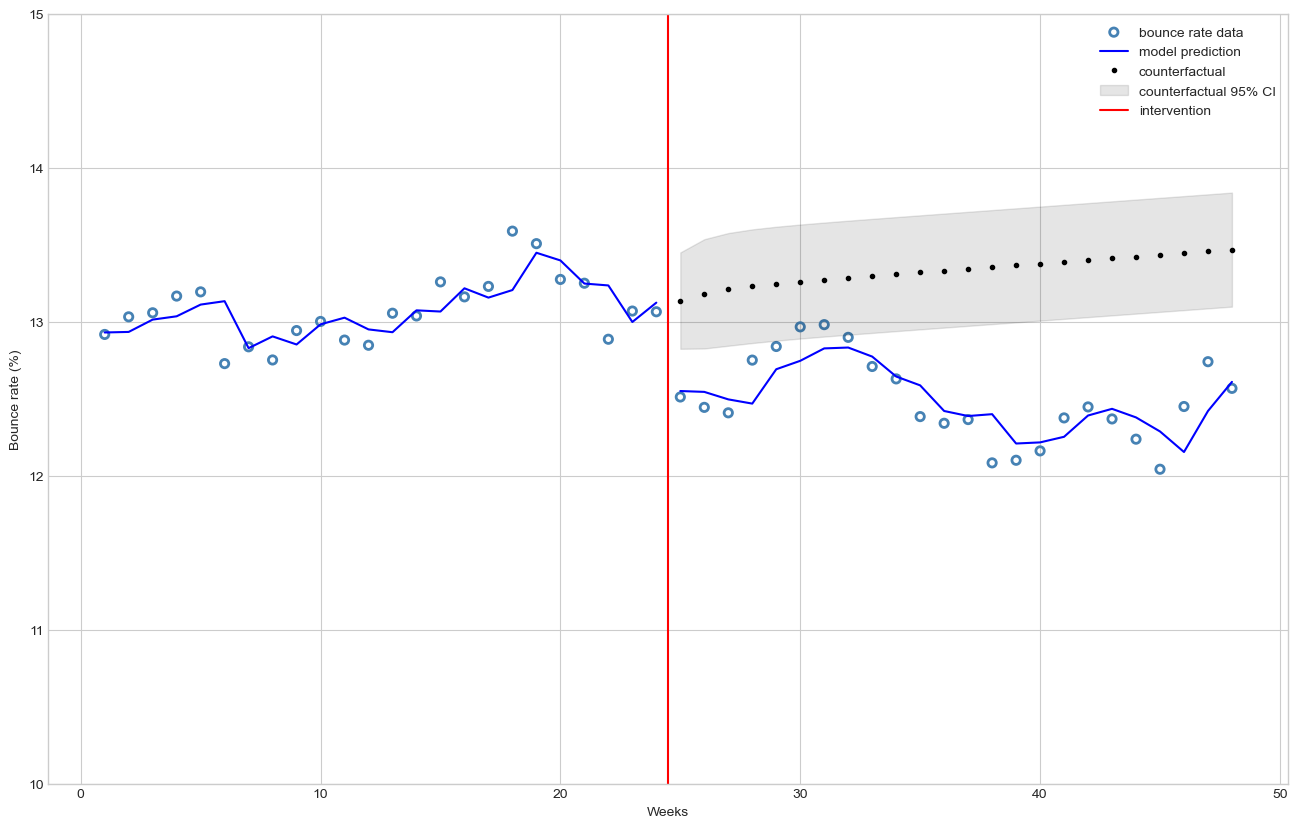

In [12]:
from statsmodels.tsa.arima.model import ARIMA

start = 24
end = 48

predictions = arima_results.get_prediction(0, end-1)
summary = predictions.summary_frame(alpha=0.05)

arima_cf = ARIMA(df["Y"][:start], df["T"][:start], order=(1,0,0)).fit()

# Model predictions means
y_pred = predictions.predicted_mean

# Counterfactual mean and 95% confidence interval
y_cf = arima_cf.get_forecast(24, exog=df["T"][start:]).summary_frame(alpha=0.05)

# Plot section
#plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(16,10))

# Plot bounce rate data
ax.scatter(df["T"], df["Y"], facecolors='none', edgecolors='steelblue', label="bounce rate data", linewidths=2)

# Plot model mean bounce prediction
ax.plot(df["T"][:start], y_pred[:start], 'b-', label="model prediction")
ax.plot(df["T"][start:], y_pred[start:], 'b-')

# Plot counterfactual mean bounce rate with 95% confidence interval
ax.plot(df["T"][start:], y_cf["mean"], 'k.', label="counterfactual")
ax.fill_between(df["T"][start:], y_cf['mean_ci_lower'], y_cf['mean_ci_upper'], color='k', alpha=0.1, label="counterfactual 95% CI");


# Plot line marking intervention moment
ax.axvline(x = 24.5, color = 'r', label = 'intervention')

ax.legend(loc='best')
plt.ylim([10, 15])
plt.xlabel("Weeks")
plt.ylabel("Bounce rate (%)");

We can clearly see that the ***ARIMA(1,0,0)*** model fits our dataset better than the OLS model.

# ARIMA RESIDUAL ANALYSIS

The summary of our autoregressive model shows a ***Prob(JB): 0.93**** which is compatible with the null-hypothesis of normal distributed residuals.

The ***Ljung-Box Q test*** verifies whether the residuls are independently distributed (they exhibit no serial autocorrelation) as ***H<sub>0</sub>*** (null-hypothesis). As the ***Prob(Q): 0.32*** is way above the standard ***$\alpha$ = 0.05*** there is no evidence of serial autocorrelation in the ARIMA residuals.

Let's now take a look at residuals ***qqplot*** to check if they follow a normal distribution:

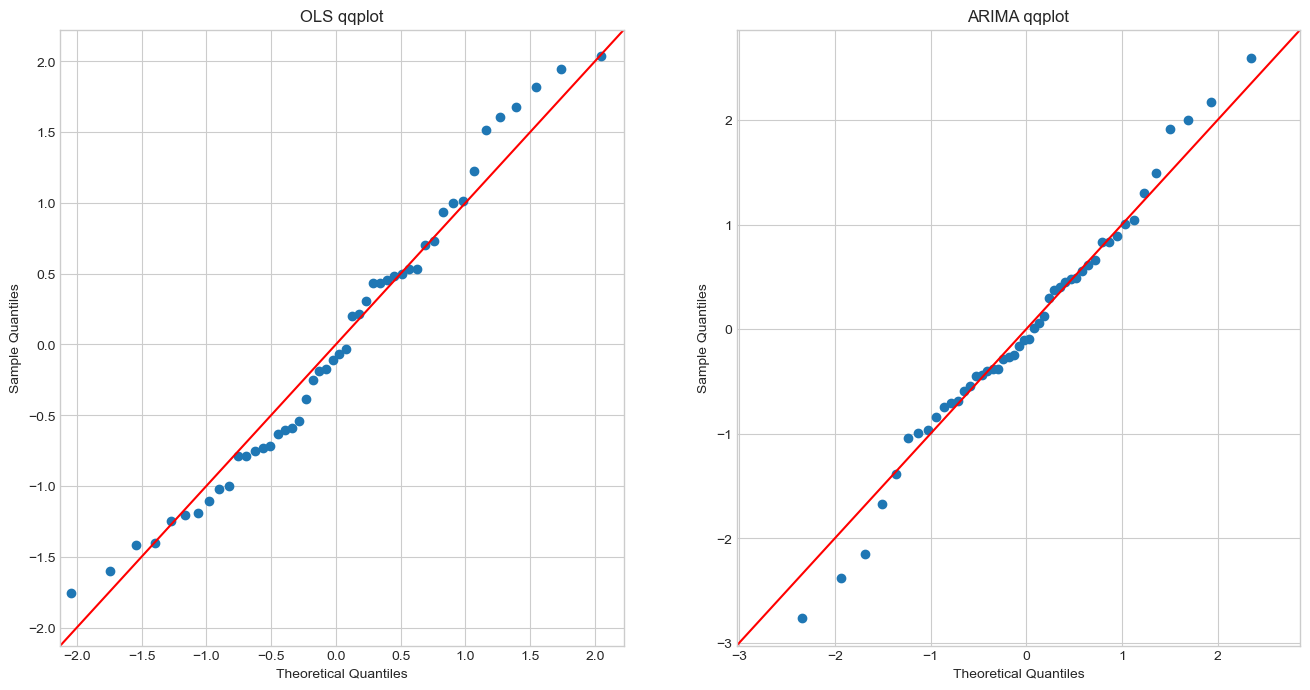

In [13]:
import scipy as sp
from statsmodels.graphics.gofplots import qqplot

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
sm.qqplot(res.resid, sp.stats.t, fit=True, line="45", ax=ax1);
ax1.set_title("OLS qqplot");

sm.qqplot(arima_results.resid, sp.stats.t, fit=True, line="45", ax=ax2);
ax2.set_title("ARIMA qqplot");
plt.show();

We may observe that the ***ARIMA(1,0,0)*** model residuals not only are in generally normally distributed as they fit beteer than the OLS model the hteoretical quantiles.

# SUMMARY

A/B tests are a the most powerful and trustworthy method to do measure the impact of modifications/changes even before they are fully implemented, which is why they are so widely used.

However, there are some scenarios where A/B tests are not feasible and this is when the knowledge of quasi-experiments becomes valuable to get statistically sound measurements of change impact.

In this post we have shown why an ordinary least square (OLS) linear regression is not a good modeling approach for time series data since they usually present non-negligible autocorrelation that violates some assumptions of OLS.

We demonstrated with an example how to use python ***(statsmodels, matplotlib, altair and pandas)*** to visualize residuals and plot autocorrelation and partial autocorrelations charts to figure out the lag of an autoregressive model and then implemented a ***ARIMA*** model using statsmodels to observe a more accurate and precise analysis and how to interpret statsmodels model output for OLS and ARIMA.

We also showed how to plot in a single chart the models estimates (mean and 95% confidence interval) for the time periods before and after intervention and its respective counterfactual.

# NEXT TO DO:

"Sample Size Planning for Interrupted Time Series Design in Health Care"
<br/>https://towardsdatascience.com/sample-size-planning-for-interrupted-time-series-design-in-health-care-e16d22bba13f#:~:text=Depending%20on%20the%20methods%20used,time%20points%20is%20the%20minimum.